### IMPORT LIBRARIES 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)


### LOAD DATASET 

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df = df[['Survived', 'Sex', 'Age', 'Fare', 'Embarked', 'Pclass']]

df.head(5)

,Survived,Sex,Age,Fare,Embarked,Pclass
0,0,male,22.0,7.2500,S,3
1,1,female,38.0,71.2833,C,1
2,1,female,26.0,7.9250,S,3
3,1,female,35.0,53.1000,S,1
4,0,male,35.0,8.0500,S,3


### Handle Missing Values

In [13]:
df.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
Embarked      2
Pclass        0
dtype: int64

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head(5)

,Survived,Sex,Age,Fare,Embarked,Pclass
0,0,male,22.0,7.2500,S,3
1,1,female,38.0,71.2833,C,1
2,1,female,26.0,7.9250,S,3
3,1,female,35.0,53.1000,S,1
4,0,male,35.0,8.0500,S,3


### Remove unnecessary columns 

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']


### Preprocessing (Encoding + Scaling)

In [20]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
     categorical_features)
])


### Train/Test Split (Stratified)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


### Train Logistic Regression Model

In [22]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

### Predictions

In [23]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [27]:
accuracy_score(y_test, y_pred)

0.757847533632287

In [28]:
precision_score(y_test, y_pred)


0.6904761904761905

In [29]:
recall_score(y_test, y_pred)


0.6744186046511628

In [30]:
f1_score(y_test, y_pred)

0.6823529411764706

### Confusion Matrix (IMAGE)

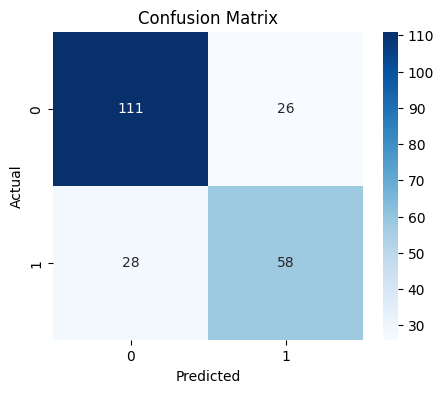

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


### ROC Curve + AUC (IMAGE)

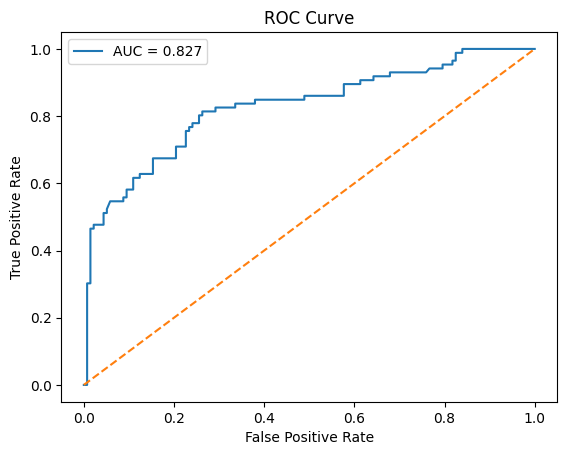

AUC Score: 0.8274062128670854


In [32]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("roc_curve.png")
plt.show()

print("AUC Score:", roc_auc)
